In [ ]:
[Projet de python pour la datascience : quel lien entre densité du bâti et transports en zones très dense ?]

#################[Projet de python pour la datascience : quel lien peut-on faire entre la densité du bâti et d'autres variables urbaines ?] (Proposer une phrase meilleure si possible)

Pourquoi s'intéresser à la densité en zone urbaine ? L'optimisation des coûts

De nos jours, les sujets de l'urbanisme et de l'organisation l'espace public correspondent à un enjeu d'efficacité de l'usage des ressources et d'efficacité économique. Le but est d'avoir une ville efficace (accès aux transports, espaces verts, bien-être...) tout en minimisant les coûts, empreintes écologiques inclues. Dans ce cadre, la densité de l'activité est un facteur clef. 

Outre les enjeux d'artificialisation des sols que l'on connaît actuellement, le document [Les liens entre densité et transports publics : intérêt et limites de la notion de densité pour expliquer les pratiques de mobilité et le choix d’un système de TCSP, d'Aline Gillette (2014)](https://dumas.ccsd.cnrs.fr/dumas-02914337/document) dresse plusieurs constats. Plus la densité de population est importante, plus la part de ménages non-motorisés est importante et plus la part de ménages multi-motorisés est faible. (0.5 voitures par ménages à Paris contre plus de 1 dans la plupart des villes étudiées). Aussi, on peut lire page 39 que lorsque la densité de population passe de 10 000 hab/km2 à 30 000 hab/km2, environ, la part modale de la voiture est divisée par 3, passant de 30% à 10%, quand celle des transports en commun et de la marche croissent de 10% respectivement.

Or le coût que représente la possession et l'usage d'une voiture est important : dans l'indice des prix à la consommation de l'INSEE, le simple achat d'automobiles représente 3.95% du budget des ménages et leur usage 9.61% (ce dernier chiffre inclus l'usage des motocyclettes, mais l'ordre de grandeur est là.), ce qui signifie que c'est un montant de plus de 15% pour un ménage motorisé (Source : [Indice français des prix à la consommation](https://fr.wikipedia.org/wiki/Indice_fran%C3%A7ais_des_prix_%C3%A0_la_consommation)). Ce d'autant plus que le chiffre précédemment cité n'inclut pas les externalités négatives en termes de sédentarité et de pollution qui affectent les finances de la sécurité sociale ainsi que la capacité de production de long terme. Le modèle de Nordaus (Chapitre 3 de Macroéconomie 1) évalue par exemple dans certains cas une taxe carbone optimale (non appliquée actuellement) de plus de 500 dollars la tonne de CO2 en 2025, soit 500*2.28/1000 = 1.14$ le litre d'essence, non-pris en compte dans les taxes actuelles qui ne compensent d'ailleurs pas le coût de l'usure des routes pour la collectivité (Source : [page 8 du bilan annuel des transports en 2023](https://www.bnsp.insee.fr/ark:/12148/bc6p09kb7p8.pdf)).

Ce faisant, l'enjeu de la très haute densité et de son aménagement en termes de transports notamment est tout a fait majeur sur le plan économique. Nous allons donc nous questionner sur les liens qui peuvent être fait entre densité et transports en zone très dense ?

Pourquoi choisir Paris ?

Pour étudier les très hautes densités, nous allons nous appuyer sur différentes bases de données traitant de Paris intra-muros et notamment [celles du site du département](https://opendata.paris.fr/pages/home/). Nous faisons ce choix en raison d'une part de la grande quantité de données disponibles et d'autre part de la grande densité d'activité sur une surface importante qui caractérise cette ville. Ces deux conditions nous permet a priori d'étudier la haute densité.

Mise en forme des bases de données et protocole de correction des densités

Il faut avant toute étape de traitement utiliser le même système de coordonnées. On choisit aussi d'utiliser le même format pour définir les zones géographiques (arrondissements, quartiers, IRIS)

Avant de se poser la question de l'échelle et du contenu de notre étude de la densité, il faut nous assurer de notre méthodologie.
La présence de multiples voies ferrées, de voies d’eau, d’espaces verts fausse les cakculs de densité en faussant la surface réellement disponible pour l’activité humaine urbaine. Il faut donc corriger ce premier problème. Pour cela, on ajoute aux bases de données différentes variables de correction de la superficie et des délimitations des aires géographiques. 

D’une part, il faut considérer les surfaces totalement inutilisables, à savoir les voies ferrées et les voies d’eau (seine, rails de la gare de Lyon, canal Saint-Martin…) qui ne pourront a priori jamais être changées d’usage.
Pour cela, on fusionne dans un premier temps les différentes surfaces de ces différentes bases de données en une grande surface, nommée useless.
[Plan de voirie - Voies d'eau](https://opendata.paris.fr/explore/dataset/plan-de-voirie-voies-deau/export/?disjunctive.lib_level&disjunctive.lib_classe&disjunctive.num_pave&location=12,48.84777,2.32498&basemap=jawg.streets)
[Plan de voirie - Emprises Ferroviaires](https://opendata.paris.fr/explore/dataset/plan-de-voirie-emprises-ferroviaires/map/?disjunctive.num_pave&location=12,48.87397,2.38026&basemap=jawg.streets)
Puis dans un second temps, pour chaque base de données contenant les aires géographiques, (base de données des arrondissements, base de données des quartiers, bases de données des iris, bases de données des pavés mosaïque du plan de Paris), on ajoute six variables :
-	useful_area_geo_shape : correspondant à la geo_shape privée de useless, donc à la partie de la zone géographique potentiellement constructible
-	superficy_useful_area : sa superficie
-	proportion_useful_area_geo : part de la surface de la zone géographique potentiellement constructible (= superficy_useful_area/surface)
-	useless_area_geo_shape : correspondant à l’intersection de la géo_shape avec useless
-	superficy_useless_area : sa superficie
-	proportion_useless_area_geo : part de la surface de la zone géographique absolument inconstructible (= superficy_useless_area/surface)


D’autre part, il faut considérer les surfaces inutilisables pour le bâti par choix, à savoir les espaces verts, qui comme le bois de Vincennes pour le douzième arrondissement, faussent les données de densité. Les espaces verts sont accessibles grace
Pour cela, chaque bases de données prise séparément n’étant pas exhaustive, on fusionne dans un premier temps les différentes surfaces de ces bases de données en une grande surface, nommée green.
[Plan de voirie - Emprises espaces verts](https://opendata.paris.fr/explore/dataset/plan-de-voirie-emprises-espaces-verts/map/?disjunctive.num_pave&location=13,48.85613,2.33717&basemap=jawg.streets)
[Espaces verts et assimilés](https://opendata.paris.fr/explore/dataset/espaces_verts/map/?disjunctive.type_ev&disjunctive.categorie&disjunctive.adresse_codepostal&disjunctive.presence_cloture&basemap=jawg.dark&location=12,48.83874,2.33356)
[Ilots de fraîcheur - Espaces verts "frais"](https://opendata.paris.fr/explore/dataset/ilots-de-fraicheur-espaces-verts-frais/map/?disjunctive.arrondissement&disjunctive.ouvert_24h&disjunctive.horaires_periode&disjunctive.statut_ouverture&disjunctive.canicule_ouverture&disjunctive.ouverture_estivale_nocturne&disjunctive.type&basemap=jawg.dark&location=13,48.82235,2.40532)
Puis dans un second temps, pour chaque base de données contenant les aires géographiques, (base de données des arrondissements, base de données des quartiers, bases de données des iris, bases de données des pavés mosaïque du plan de Paris), on ajoute six variables :
-	useful_grey_area_geo_shape correspondant à la useful_area_geo_shape privée de green, donc à la partie de la zone géographique potentiellement constructible non-occupée par des espaces verts.
-	superficy_useful_grey_area : sa superficie
-	proportion_useful_grey_area : part de la surface de la zone géographique potentiellement constructible non-occupée par des espaces verts (=superficy_useful_grey_area/superficy_useful_area)
-	green_area_geo_shape correspondant à l’intersection de la useful_area_geo_shape avec green, donc à la partie de la zone géographique potentiellement constructible occupée par des espaces verts
-	superficy_green_area : sa superficie
-	proportion_green_area : part de la surface de la zone géographique potentiellement constructible occupée par des espaces verts (=superficy_green_area/superficy_useful_area)


A partir de là, pour les différents types de zones géographiques (arrondissement, quartier, , iris, pavé mosaïque), on peut obtenir une carte avec :
-	leurs délimitations 
-	en noir les zones absolument inconstructibles (voies ferrées et voies d’eau)
-	en hachuré vert les espaces verts
Et où en cliquant sur chaque zone géographique, on accède à :
-	proportion_useless_area_geo
-	proportion_useful_grey_area
-	proportion_green_area


Quelles échelles pour mener une étude sur la densité ?

Il nous faut réaliser un état des lieux de la densité à Paris à différentes échelles. En effet, un échelle trop grande de permet de saisir les spécificités des différents endroits, quand une échelle trop précise fait perdre son sens à la densité qui est une valeur moyenne. Par exemple, mesurer la densité en station de métro îlot urbain par îlot urbain (=pâté de maison) ne fait  guère de sens (beaucoup de valeurs nulles), quand mesurer présence d'arbres à l'échelle d'un arrondissement ne permet pas de saisir les spécificités des différent quartiers. C'est la raison pour laquelle nous allons procéder à l'échelle des 20 [arrondissements](https://opendata.paris.fr/explore/dataset/arrondissements/information/?disjunctive.l_ar&disjunctive.c_arinsee&disjunctive.c_ar)s, mais aussi des 80 [quartiers administratifs](https://opendata.paris.fr/explore/dataset/quartier_paris/information/?disjunctive.c_ar) et des [992 IRIS](https://www.insee.fr/fr/metadonnees/definition/c1523) (maille définie par l'INSEE contenant environ 2000 habitants).

In [1]:
# VRAI Partie 1 - Densité du bâti
# idée: utiliser les données de bâti (emprise au sol, hauteur, surface) pour calculer la densité du bâti par zone géographique (ex: par arrondissement ou par grille régulière).
# on choisit un maillage (soit par surface soit par logique administrative) et on calcule la densité du bâti dans chaque cellule du maillage.

#pour le projet: on va vouloir comparer cette densité de bâti à d'autres données de la ville en se disant qu'à priori cette densité est un proxy pour la densité d'activité humaine (bureaux ect qui ne sont pas compris dans les habitants)



MAILLAGES GÉOGRAPHIQUES DE PARIS

1. Pour charger les arrondissements :
   arr = get_arrondissements_paris()

2. Pour charger les quartiers :
   qua = get_quartiers_paris()

3. Pour charger les IRIS (recommandé pour analyses fines) :
   iris = get_iris_paris()

4. Pour le carroyage 200m (très détaillé) :
   car_200m = get_carroyage_200m_paris()

5. Pour le carroyage 1km (intermédiaire) :
   car_1km = get_carroyage_1km_paris()

6. Pour visualiser tous les maillages :
   visualiser_maillages()

RECOMMANDATIONS PAR CAS D'USAGE
• Analyse macro / Communication : Arrondissements (20)
• Analyse intermédiaire : Quartiers (80)
• Analyse fine / Sociodémographie : IRIS (~1000)
• Analyse ultra-fine / Urbanisme : Carroyage 200m
• Grille régulière neutre : Carroyage 200m ou 1km

1/5 Chargement des arrondissements...
✓ Arrondissements chargés : 20 unités

2/5 Chargement des quartiers...
✓ Quartiers chargés : 80 unités

3/5 Chargement des IRIS...
📍 Tentative méthode 1 (Open Data IDF)...
⏳ Téléchargeme

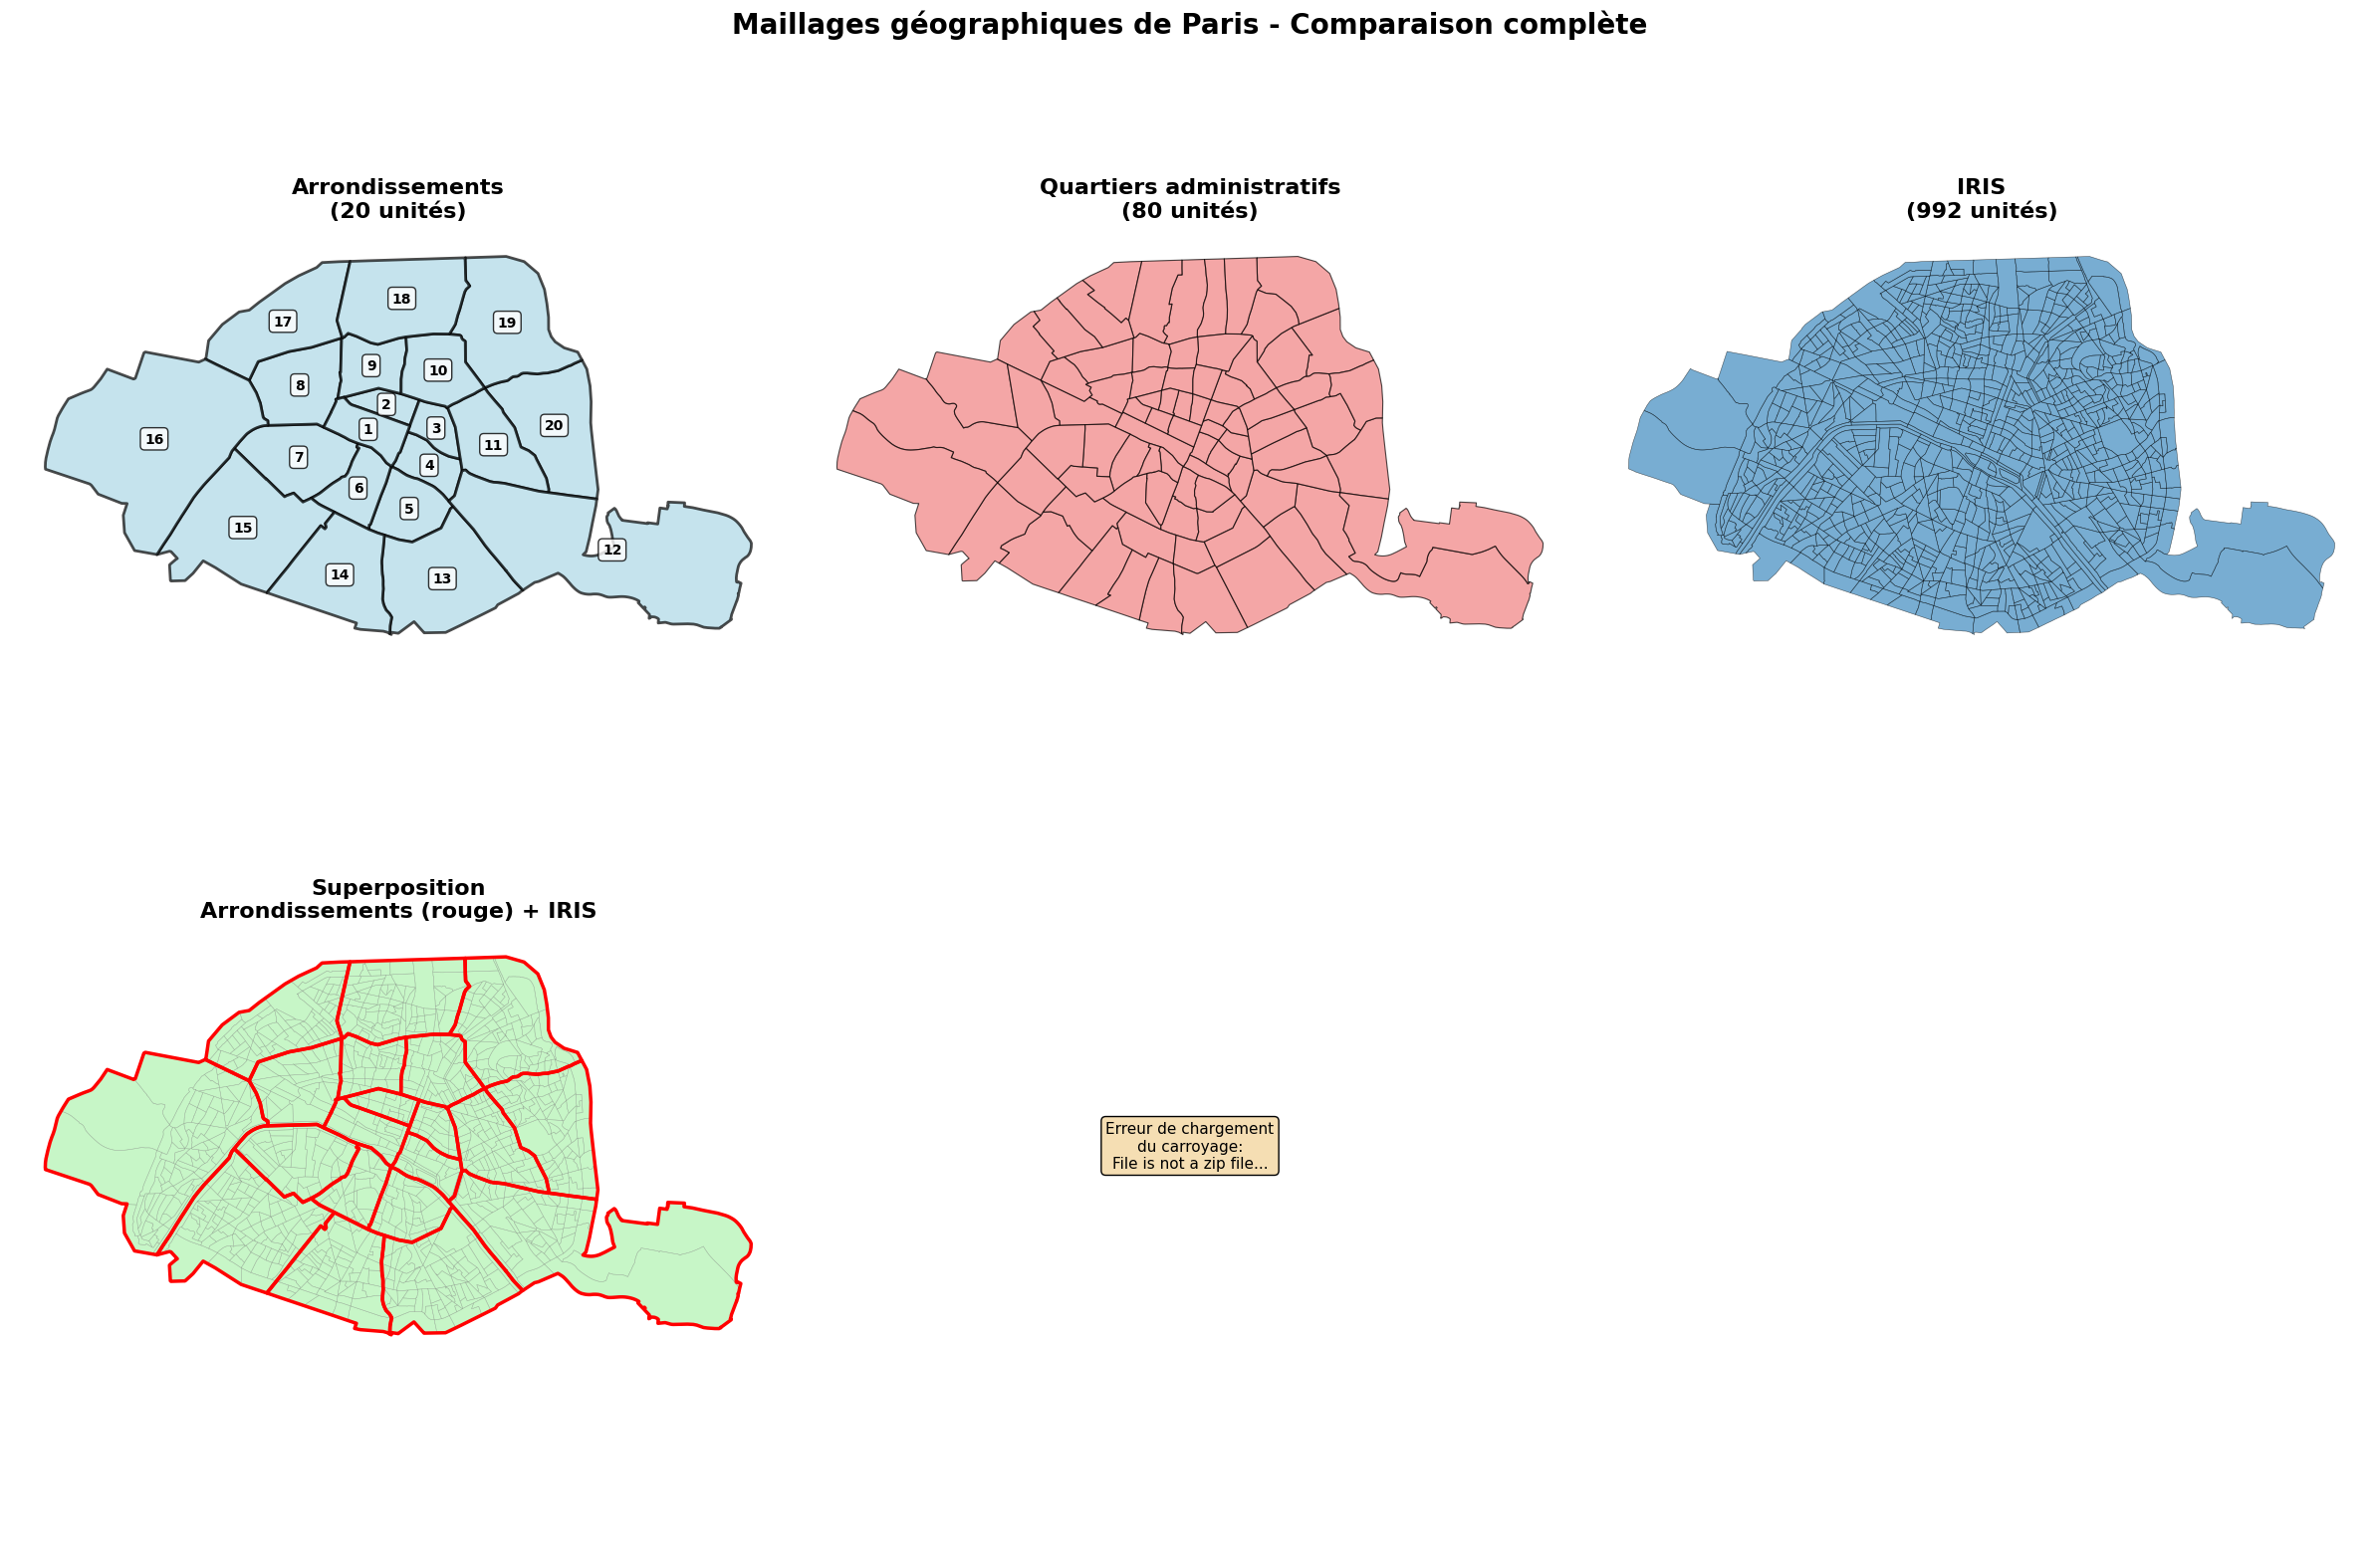

In [ ]:
#Prend 20s
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import py7zr

# ============================================================================
# 1. ARRONDISSEMENTS DE PARIS
# ============================================================================
def get_arrondissements_paris():
    """Télécharge les contours des arrondissements de Paris"""
    url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/arrondissements/exports/geojson"
    
    gdf = gpd.read_file(url)
    print(f"✓ Arrondissements chargés : {len(gdf)} unités")
    return gdf

# ============================================================================
# 2. QUARTIERS ADMINISTRATIFS DE PARIS (80 quartiers)
# ============================================================================
def get_quartiers_paris():
    """Télécharge les contours des quartiers administratifs de Paris"""
    url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/quartier_paris/exports/geojson"
    
    gdf = gpd.read_file(url)
    print(f"✓ Quartiers chargés : {len(gdf)} unités")
    return gdf

# ============================================================================
# 3. IRIS DE PARIS - MÉTHODE 1 : via Open Data Île-de-France (RECOMMANDÉE)
# ============================================================================
def get_iris_paris_method1():
    """
    Télécharge les IRIS de Paris via Open Data Île-de-France (GeoJSON)
    MÉTHODE RECOMMANDÉE : Simple et rapide
    """
    url = "https://data.iledefrance.fr/api/explore/v2.1/catalog/datasets/iris/exports/geojson"
    
    print("⏳ Téléchargement des IRIS d'Île-de-France...")
    gdf = gpd.read_file(url)
    
    # Filtrer pour Paris uniquement (codes communes 75101 à 75120)
    gdf_paris = gdf[gdf['depcom'].str.startswith('751')].copy()
    
    print(f"✓ IRIS de Paris chargés : {len(gdf_paris)} unités")
    if 'typ_iris' in gdf_paris.columns:
        print(f"  Types d'IRIS : {gdf_paris['typ_iris'].value_counts().to_dict()}")
    return gdf_paris

# ============================================================================
# 4. IRIS DE PARIS - MÉTHODE 2 : via IGN (fichier 7z)
# ============================================================================
def get_iris_paris_method2():
    """
    Télécharge les IRIS de Paris directement depuis l'IGN
    Format : 7z contenant un shapefile
    """
    # URL directe pour le département 75 (Paris)
    url = "https://data.geopf.fr/telechargement/download/IRIS-GE/IRIS-GE_3-0__SHP_LAMB93_D075_2024-01-01/IRIS-GE_3-0__SHP_LAMB93_D075_2024-01-01.7z"
    
    print("⏳ Téléchargement des IRIS depuis l'IGN (fichier 7z)...")
    response = requests.get(url)
    
    # Extraire le fichier 7z
    with py7zr.SevenZipFile(BytesIO(response.content), mode='r') as z:
        z.extractall(path='temp_iris_ign')
    
    # Charger le shapefile (chercher le fichier .shp)
    import os
    shp_files = [f for f in os.listdir('temp_iris_ign/IRIS-GE_3-0__SHP_LAMB93_D075_2024-01-01') 
                 if f.endswith('.shp')]
    
    if shp_files:
        gdf = gpd.read_file(f'temp_iris_ign/IRIS-GE_3-0__SHP_LAMB93_D075_2024-01-01/{shp_files[0]}')
        print(f"✓ IRIS de Paris chargés : {len(gdf)} unités")
        return gdf
    else:
        print("❌ Fichier shapefile non trouvé dans l'archive")
        return None

# ============================================================================
# 5. IRIS DE PARIS - MÉTHODE 3 : via Opendatasoft (si méthode 1 échoue)
# ============================================================================
def get_iris_paris_method3():
    """
    Alternative via Opendatasoft
    """
    url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-france-iris/exports/geojson?where=dep_code='75'&lang=fr&timezone=Europe%2FParis"
    
    print("⏳ Téléchargement via Opendatasoft...")
    gdf = gpd.read_file(url)
    
    print(f"✓ IRIS de Paris chargés : {len(gdf)} unités")
    return gdf

# Fonction wrapper pour faciliter l'utilisation
def get_iris_paris():
    """
    Télécharge les IRIS de Paris en essayant plusieurs méthodes
    """
    try:
        print("📍 Tentative méthode 1 (Open Data IDF)...")
        return get_iris_paris_method1()
    except Exception as e:
        print(f"⚠️ Méthode 1 échouée : {e}")
        try:
            print("📍 Tentative méthode 3 (Opendatasoft)...")
            return get_iris_paris_method3()
        except Exception as e2:
            print(f"⚠️ Méthode 3 échouée : {e2}")
            print("💡 Essayez : pip install py7zr")
            print("📍 Tentative méthode 2 (IGN avec 7z)...")
            return get_iris_paris_method2()

# ============================================================================
# 6. CARROYAGE INSEE 200m - PARIS
# ============================================================================
def get_carroyage_200m_paris():
    """
    Télécharge le carroyage INSEE 200m pour Paris
    Note : fichier volumineux
    """
    url = "https://www.insee.fr/fr/statistiques/fichier/7655475/car_m.zip"
    
    print("⏳ Téléchargement du carroyage 200m (fichier volumineux, ~500Mo)...")
    response = requests.get(url, stream=True)
    
    with ZipFile(BytesIO(response.content)) as z:
        z.extractall("temp_carroyage_200m")
    
    # Charger le shapefile
    gdf = gpd.read_file("temp_carroyage_200m/car_m.shp")
    
    # Filtrer pour Paris (codes communes 75101 à 75120)
    paris_codes = [f'75{str(i).zfill(3)}' for i in range(101, 121)]
    gdf_paris = gdf[gdf['Depcom'].isin(paris_codes)].copy()
    
    print(f"✓ Carreaux 200m de Paris chargés : {len(gdf_paris)} carreaux")
    return gdf_paris

# ============================================================================
# 7. CARROYAGE INSEE 1km - PARIS
# ============================================================================
def get_carroyage_1km_paris():
    """
    Télécharge le carroyage INSEE 1km pour Paris
    Plus léger que le 200m
    """
    url = "https://www.insee.fr/fr/statistiques/fichier/7655475/car_1km.zip"
    
    print("⏳ Téléchargement du carroyage 1km...")
    response = requests.get(url, stream=True)
    
    with ZipFile(BytesIO(response.content)) as z:
        z.extractall("temp_carroyage_1km")
    
    gdf = gpd.read_file("temp_carroyage_1km/car_1km.shp")
    
    # Filtrer pour Paris
    paris_codes = [f'75{str(i).zfill(3)}' for i in range(101, 121)]
    gdf_paris = gdf[gdf['Depcom'].isin(paris_codes)].copy()
    
    print(f"✓ Carreaux 1km de Paris chargés : {len(gdf_paris)} carreaux")
    return gdf_paris

# ============================================================================
# VISUALISATION COMPARATIVE - VERSION COMPLÈTE
# ============================================================================
def visualiser_maillages(inclure_carroyage=False):
    """
    Crée une figure comparative de TOUS les maillages de Paris
    
    Parameters:
    -----------
    inclure_carroyage : bool
        Si True, inclut le carroyage 1km (attention: téléchargement plus long)
    """
    # Déterminer le nombre de subplots
    if inclure_carroyage:
        fig, axes = plt.subplots(2, 3, figsize=(24, 16))
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(2, 2, figsize=(20, 16))
        axes = axes.flatten()
    
    # Arrondissements
    print("\n1/5 Chargement des arrondissements...")
    
    
    arr.plot(ax=axes[0], edgecolor='black', facecolor='lightblue', linewidth=2, alpha=0.7)
    axes[0].set_title(f'Arrondissements\n({len(arr)} unités)', 
                      fontsize=16, fontweight='bold', pad=15)
    axes[0].axis('off')
    
    # Ajouter les numéros d'arrondissements
    for idx, row in arr.iterrows():
        centroid = row.geometry.centroid
        # Chercher la colonne du numéro d'arrondissement
        num_col = next((col for col in ['c_ar', 'n_sq_ar', 'l_ar'] if col in arr.columns), None)
        if num_col:
            axes[0].text(centroid.x, centroid.y, str(row[num_col]), 
                        ha='center', va='center', fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Quartiers
    print("\n2/5 Chargement des quartiers...")
    qua = get_quartiers_paris()
    qua.plot(ax=axes[1], edgecolor='black', facecolor='lightcoral', linewidth=0.8, alpha=0.7)
    axes[1].set_title(f'Quartiers administratifs\n({len(qua)} unités)', 
                      fontsize=16, fontweight='bold', pad=15)
    axes[1].axis('off')
    
    # IRIS
    print("\n3/5 Chargement des IRIS...")
    iris = get_iris_paris()
    
    # Créer une palette de couleurs par arrondissement pour les IRIS
    import matplotlib.cm as cm
    import numpy as np
    
    # Extraire l'arrondissement du code commune
    if 'depcom' in iris.columns:
        iris['arrondissement'] = iris['depcom'].str[-2:].astype(int)
    elif 'insee_com' in iris.columns:
        iris['arrondissement'] = iris['insee_com'].str[-2:].astype(int)
    else:
        iris['arrondissement'] = 1  # Fallback
    
    colors = cm.tab20(np.linspace(0, 1, 20))
    iris['color'] = iris['arrondissement'].apply(lambda x: colors[x-1] if x <= 20 else colors[0])
    
    iris.plot(ax=axes[2], edgecolor='black', color=iris['color'], linewidth=0.4, alpha=0.6)
    axes[2].set_title(f'IRIS\n({len(iris)} unités)', 
                      fontsize=16, fontweight='bold', pad=15)
    axes[2].axis('off')
    
    # Superposition Arrondissements + IRIS
    print("\n4/5 Création superposition Arrondissements + IRIS...")
    iris.plot(ax=axes[3], edgecolor='gray', facecolor='lightgreen', 
              linewidth=0.3, alpha=0.5)
    arr.plot(ax=axes[3], edgecolor='red', facecolor='none', linewidth=2.5)
    axes[3].set_title('Superposition\nArrondissements (rouge) + IRIS', 
                      fontsize=16, fontweight='bold', pad=15)
    axes[3].axis('off')
    
    # Carroyage ou info
    if inclure_carroyage:
        print("\n5/5 Chargement du carroyage 1km (peut prendre 1-2 minutes)...")
        try:
            car = get_carroyage_1km_paris()
            car.plot(ax=axes[4], edgecolor='navy', facecolor='lightyellow', 
                    linewidth=0.3, alpha=0.6)
            axes[4].set_title(f'Carroyage INSEE 1km\n({len(car)} carreaux)', 
                            fontsize=16, fontweight='bold', pad=15)
            axes[4].axis('off')
            
            # Superposition Carroyage + Arrondissements
            car.plot(ax=axes[5], edgecolor='gray', facecolor='lightyellow', 
                    linewidth=0.2, alpha=0.5)
            arr.plot(ax=axes[5], edgecolor='black', facecolor='none', linewidth=2)
            axes[5].set_title('Superposition\nCarroyage 1km + Arrondissements', 
                            fontsize=16, fontweight='bold', pad=15)
            axes[5].axis('off')
        except Exception as e:
            axes[4].text(0.5, 0.5, f'Erreur de chargement\ndu carroyage:\n{str(e)[:50]}...', 
                        ha='center', va='center', fontsize=11,
                        bbox=dict(boxstyle='round', facecolor='wheat'))
            axes[4].axis('off')
            axes[5].axis('off')
    else:
        # Info carroyage
        axes[3].text(0.5, 0.05, 
                    '💡 Pour voir aussi le carroyage 1km:\nvisualiser_maillages(inclure_carroyage=True)',
                    ha='center', va='bottom', fontsize=11, transform=axes[3].transAxes,
                    bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    # Titre général
    fig.suptitle('Maillages géographiques de Paris - Comparaison complète', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.savefig('maillages_paris_complet.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualisation sauvegardée : maillages_paris_complet.png")
    plt.show()
    
    return {'arrondissements': arr, 'quartiers': qua, 'iris': iris}

# ============================================================================
# GUIDE D'UTILISATION
# ============================================================================
if __name__ == "__main__":
    print("=" * 70)
    print("MAILLAGES GÉOGRAPHIQUES DE PARIS")
    print("=" * 70)
    
    print("\n1. Pour charger les arrondissements :")
    print("   arr = get_arrondissements_paris()")
    
    print("\n2. Pour charger les quartiers :")
    print("   qua = get_quartiers_paris()")
    
    print("\n3. Pour charger les IRIS (recommandé pour analyses fines) :")
    print("   iris = get_iris_paris()")
    
    print("\n4. Pour le carroyage 200m (très détaillé) :")
    print("   car_200m = get_carroyage_200m_paris()")
    
    print("\n5. Pour le carroyage 1km (intermédiaire) :")
    print("   car_1km = get_carroyage_1km_paris()")
    
    print("\n6. Pour visualiser tous les maillages :")
    print("   visualiser_maillages()")
    
    print("\n" + "=" * 70)
    print("RECOMMANDATIONS PAR CAS D'USAGE")
    print("=" * 70)
    print("• Analyse macro / Communication : Arrondissements (20)")
    print("• Analyse intermédiaire : Quartiers (80)")
    print("• Analyse fine / Sociodémographie : IRIS (~1000)")
    print("• Analyse ultra-fine / Urbanisme : Carroyage 200m")
    print("• Grille régulière neutre : Carroyage 200m ou 1km")
    
    visualiser_maillages(inclure_carroyage=True)

Statistiques descriptive des arrondissements
Concernant les arrondissements, ils sont assez divers en termes de superficie, allant de 1km2 (2ème) à 16 km2 (16ème), avec une moyenne de 5.3km2 et une médiane plus faible de 4.4km2, ce qui nous confirme l'existence de très grandes valeurs pour certains arrondissements. C'est notre plus gros maillage disponible et il est utile pour calculer des densités pour des équipements rares, comme des stations de métro.
Concernant les quartiers, ils sont assez divers en termes de superficie, allant de 0.19km2 à 7.2km2, avec une moyenne de 1.3km2 et une médiane de 0.93km2, ce qui nous confirme encore l'existence de très grandes valeurs pour certains quartiers. C'est un maillage de taille intermédiaire permettant une analyse plus fine des équipements plus fréquents comme les arrêts de bus par exemple.
Concernant les IRIS, 
######Statistiques descriptives sur les IRIS à faire
Les très grandes valeurs observées rapellent l'existence des bois comme celui de Vincennes ou de Boulogne mais aussi celles des voies d'eau et des voies ferrées qui tendent à accoître artificiellement les zones géographiques. Cela nous conforte dans le choix de correction de la densité en prenant en compte les espaces verts, voies ferrées et voies d'eau.


In [24]:
arr = get_arrondissements_paris()
arr.describe()

✓ Arrondissements chargés : 20 unités


,n_sq_ar,c_ar,c_arinsee,n_sq_co,surface,perimetre
count,2.000000e+01,20.00000,20.00000,20.0,2.000000e+01,20.000000
mean,7.500000e+08,10.50000,75110.50000,750001537.0,5.268639e+06,9522.189982
std,5.916080e+00,5.91608,5.91608,0.0,4.362220e+06,4726.891345
min,7.500000e+08,1.00000,75101.00000,750001537.0,9.911537e+05,4519.263648
25%,7.500000e+08,5.75000,75105.75000,750001537.0,2.172001e+06,6413.490067
50%,7.500000e+08,10.50000,75110.50000,750001537.0,3.985047e+06,8190.718385
75%,7.500000e+08,15.25000,75115.25000,750001537.0,6.195201e+06,10894.980257
max,7.500000e+08,20.00000,75120.00000,750001537.0,1.637254e+07,24089.666298


In [ ]:
qua = get_quartiers_paris()
qua.describe()

✓ Quartiers chargés : 80 unités


,c_ar,perimetre,surface,st_area_shape,st_perimeter_shape
count,80.000000,80.000000,8.000000e+01,8.000000e+01,80.000000
mean,10.500000,4830.853049,1.317160e+06,1.317160e+06,4830.625980
std,5.802662,2910.743227,1.332116e+06,1.332116e+06,2910.554868
min,1.000000,1861.804114,1.880122e+05,1.880122e+05,1861.724892
25%,5.750000,3038.647297,4.971428e+05,4.971428e+05,3038.475899
50%,10.500000,4481.332483,9.282372e+05,9.282372e+05,4481.132366
75%,15.250000,5423.940542,1.468378e+06,1.468378e+06,5423.740849
max,20.000000,18427.822238,7.205014e+06,7.205014e+06,18426.599903


In [22]:
iris = get_iris_paris_method3()
iris.head(992)


⏳ Téléchargement via Opendatasoft...
✓ IRIS de Paris chargés : 992 unités


,geo_point_2d,year,reg_code,reg_name,dep_code,dep_name,arrdep_code,arrdep_name,ze2020_code,ze2020_name,...,iris_name_upper,iris_name_lower,iris_area_code,iris_type,iris_grd_quart_code,iris_grd_quart_name,iris_in_ctu,ze2010_code,ze2010_name,geometry
0,"{'lon': 2.344671394518496, 'lat': 48.829432531...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,MAISON BLANCHE 19,maison blanche 19,FXX,iris d'habitat,7511351,Maison Blanche,Non,None,None,"POLYGON ((2.34284 48.82855, 2.34457 48.82815, ..."
1,"{'lon': 2.3792404744782125, 'lat': 48.89396705...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,PONT DE FLANDRE 6,pont de flandre 6,FXX,iris d'habitat,7511974,Pont de Flandre,Non,None,None,"POLYGON ((2.3768 48.89348, 2.37802 48.89287, 2..."
2,"{'lon': 2.2872800249365057, 'lat': 48.88133028...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,TERNES 7,ternes 7,FXX,iris d'habitat,7511765,Ternes,Non,None,None,"POLYGON ((2.2843 48.88087, 2.28452 48.88083, 2..."
3,"{'lon': 2.3542883098444394, 'lat': 48.86648559...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,ARTS ET MÉTIERS 5,arts et métiers 5,FXX,iris d'habitat,7510309,Arts et Métiers,Non,None,None,"POLYGON ((2.35151 48.86443, 2.35206 48.86455, ..."
4,"{'lon': 2.3922631046541567, 'lat': 48.87305066...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,BELLEVILLE 13,belleville 13,FXX,iris d'habitat,7512077,Belleville,Non,None,None,"POLYGON ((2.38952 48.87372, 2.38974 48.8736, 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,"{'lon': 2.3990017875037273, 'lat': 48.85626975...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,CHARONNE 25,charonne 25,FXX,iris d'habitat,7512080,Charonne,Non,None,None,"POLYGON ((2.39713 48.85684, 2.39725 48.85664, ..."
988,"{'lon': 2.303262165688245, 'lat': 48.838939165...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,SAINT-LAMBERT 30,saint-lambert 30,FXX,iris d'habitat,7511557,Saint-Lambert,Non,None,None,"POLYGON ((2.30009 48.83913, 2.30047 48.83878, ..."
989,"{'lon': 2.323933921338851, 'lat': 48.892819526...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,ÉPINETTES 8,épinettes 8,FXX,iris d'habitat,7511768,Épinettes,Non,None,None,"POLYGON ((2.32121 48.89171, 2.32215 48.89191, ..."
990,"{'lon': 2.33522308849345, 'lat': 48.8705092892...",2024,[11],[Île-de-France],[75],[Paris],[751],[Paris],None,None,...,GAILLON 3,gaillon 3,FXX,iris d'activité,7510205,Gaillon,Non,None,None,"POLYGON ((2.33252 48.87069, 2.33266 48.87032, ..."


si corrélation n'est pas causalité, on peut quand même de notre côté affirmer que plus la densité de bâti augmente, plus la densité de population peut être importante, et plus une station de transport en commun par unité de surface dessert une activité importante.
/!\ Il faut autant que possible enlever les grands espaces verts ainsi que les surfaces de voies ferrées et fluviales qui faussent les calculs de densité du bâti.

In [3]:
import pandas as pd
"""
Chargement de la base de données contenant les informations permettant d'obtenir les volumes bâtis
/!\ Prend 3 min
"""
print("\n2/5 Chargement des volumes bâtis...")
url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/volumesbatisparis/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"
df_bati = pd.read_csv(url, sep=";")
df_bati.head()


2/5 Chargement des volumes bâtis...


,geom_x_y,geom,C_NAT_B,L_NAT_B,C_SRC,L_SRC,M2,NB_PL,M2_PL_TOT,B_RDC,...,L_PLAN_H,H_ET_MAX,N_QU,OBJECTID,Identifiant s?quentiel,Arrondissement contenant le bati,Parcelle contenant le bati,Quartier contenant le bati,st_area(shape),st_perimeter(shape)
0,"48.85067128509409, 2.296102761329645","{""coordinates"": [[[2.29609651362455, 48.850680...",U,Volume bâti avec surplomb,T,Fiche parcellaire et terrain certifié,2.406392,1.0,2.406392,0.0,...,NaN,4.0,59.0,199989,750199402,750000015,750043607.0,750000059.0,2.406095,6.545640
1,"48.851843744061945, 2.292957185911751","{""coordinates"": [[[2.2929301542798037, 48.8518...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,2.820885,8.0,22.567076,1.0,...,R+7,7.0,59.0,200008,750199421,750000015,750044085.0,750000059.0,2.820854,12.950555
2,"48.85248313229562, 2.2949179453720525","{""coordinates"": [[[2.2949337425782037, 48.8525...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,31.558890,8.0,252.471120,1.0,...,R+7,7.0,59.0,200011,750199424,750000015,750044375.0,750000059.0,31.555241,65.275538
3,"48.85327255954386, 2.2957036590050377","{""coordinates"": [[[2.2956364269943847, 48.8533...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,116.588506,6.0,699.531038,1.0,...,R+5,5.0,59.0,200032,750199445,750000015,750044174.0,750000059.0,116.576872,54.388227
4,"48.85411095687184, 2.2940009923578586","{""coordinates"": [[[2.2939959742813185, 48.8541...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,14.949791,1.0,14.949791,1.0,...,R,0.0,59.0,200060,750199473,750000015,750043086.0,750000059.0,14.948056,15.430769


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Supposons le CRS standard pour les données de Paris (Lambert 93)
CRS_PARIS = 'EPSG:2154' 

# Conversion de df_bati en GeoDataFrame
# Utilisation des colonnes 'X' et 'Y' pour créer les géométries (Points)
gdf_bati = gpd.GeoDataFrame(
    df_bati, 
    geometry=gpd.points_from_xy(df_bati.X, df_bati.Y), 
    crs=CRS_PARIS
)

print(f"CRS de gdf_bati : {gdf_bati.crs}")
gdf_bati.head()

CRS de gdf_bati : EPSG:2154


,geom_x_y,geom,C_NAT_B,L_NAT_B,C_SRC,L_SRC,M2,NB_PL,M2_PL_TOT,B_RDC,...,H_ET_MAX,N_QU,OBJECTID,Identifiant s?quentiel,Arrondissement contenant le bati,Parcelle contenant le bati,Quartier contenant le bati,st_area(shape),st_perimeter(shape),geometry
0,"48.85067128509409, 2.296102761329645","{""coordinates"": [[[2.29609651362455, 48.850680...",U,Volume bâti avec surplomb,T,Fiche parcellaire et terrain certifié,2.406392,1.0,2.406392,0.0,...,4.0,59.0,199989,750199402,750000015,750043607.0,750000059.0,2.406095,6.545640,POINT (597033.683 127801.456)
1,"48.851843744061945, 2.292957185911751","{""coordinates"": [[[2.2929301542798037, 48.8518...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,2.820885,8.0,22.567076,1.0,...,7.0,59.0,200008,750199421,750000015,750044085.0,750000059.0,2.820854,12.950555,POINT (596802.871 127932.006)
2,"48.85248313229562, 2.2949179453720525","{""coordinates"": [[[2.2949337425782037, 48.8525...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,31.558890,8.0,252.471120,1.0,...,7.0,59.0,200011,750199424,750000015,750044375.0,750000059.0,31.555241,65.275538,POINT (596941.154 128002.174)
3,"48.85327255954386, 2.2957036590050377","{""coordinates"": [[[2.2956364269943847, 48.8533...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,116.588506,6.0,699.531038,1.0,...,5.0,59.0,200032,750199445,750000015,750044174.0,750000059.0,116.576872,54.388227,POINT (597006.734 128090.675)
4,"48.85411095687184, 2.2940009923578586","{""coordinates"": [[[2.2939959742813185, 48.8541...",V,Volume bâti simple,T,Fiche parcellaire et terrain certifié,14.949791,1.0,14.949791,1.0,...,0.0,59.0,200060,750199473,750000015,750043086.0,750000059.0,14.948056,15.430769,POINT (596879.383 128184.206)


In [5]:
import pandas as pd
import geopandas as gpd

# 1. Charger le fichier IRIS téléchargé manuellement
path_iris = "Data/georef-france-iris.geojson" 
gdf_iris = gpd.read_file(path_iris)

# On s'assure d'être en Lambert 93 (EPSG:2154) pour les calculs de surface en France
if gdf_iris.crs != "EPSG:2154":
    gdf_iris = gdf_iris.to_crs("EPSG:2154")

gdf_iris.head()

DataSourceError: Data/georef-france-iris.geojson: No such file or directory

In [6]:
df_bati.geom[0]

'{"coordinates": [[[2.29609651362455, 48.850680826832445], [2.296099170576435, 48.85067914716742], [2.2961006787769014, 48.85068018580923], [2.2961181929552823, 48.8506691124816], [2.2961065419050404, 48.85066108638811], [2.2960892720996258, 48.85067232933235], [2.29609115701201, 48.85067362740792], [2.2960885014227452, 48.850675307080785], [2.29609651362455, 48.850680826832445]]], "type": "Polygon"}'

In [7]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import shape # Importation de 'shape' pour parser le GeoJSON

# --- 0. Définition du CRS pour Paris (Lambert 93) ---
CRS_PARIS = "EPSG:2154" 
CRS_FOLIUM = 4326 # WGS84 (Lat/Lon) pour la cartographie

# --- 1. Récupération des arrondissements officiels (WGS84 puis reprojection) ---
print("1. Récupération des arrondissements de Paris...")
url_arrondissements = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/arrondissements/exports/geojson?lang=fr&timezone=Europe%2FParis"
try:
    gdf_arrondissements = gpd.read_file(url_arrondissements).to_crs(CRS_PARIS)
    gdf_arrondissements = gdf_arrondissements[['c_ar', 'geometry']].rename(columns={'c_ar': 'CODE_ARROND'})
    print(f"   {len(gdf_arrondissements)} arrondissements chargés.")
except Exception as e:
    print(f"   Erreur de téléchargement des arrondissements : {e}")
    # Ne peut pas continuer sans les géométries d'arrondissements.
    raise Exception("Erreur critique: Les géométries d'arrondissement n'ont pas pu être chargées.")


import pandas as pd
import geopandas as gpd
from shapely.geometry import shape

import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import json # Assurez-vous que json est importé

# --- NOUVELLE FONCTION DE PARSING ROBUSTE ---
def parse_geometry(geom_data):
    """
    Parse une donnée GeoJSON qui peut être une chaîne, un dictionnaire, ou un float (NaN).
    """
    if pd.isna(geom_data):
        # Ignorer les valeurs NaN/None
        return None
    elif isinstance(geom_data, str):
        # Si c'est une chaîne, on la charge en JSON
        try:
            return shape(json.loads(geom_data))
        except json.JSONDecodeError:
            # Gérer les chaînes mal formées si nécessaire, mais ici on retourne None
            return None
    elif isinstance(geom_data, dict):
        # Si c'est déjà un dictionnaire, conversion directe par shape
        return shape(geom_data)
    else:
        # Gérer le cas du float (ou autre type indésirable)
        return None

# --- CORRECTION DE L'ÉTAPE 2 ---
print("2. Conversion de df_bati en GeoDataFrame (via geom - Polygones)...")

# Application de la fonction de parsing robuste
df_bati['geometry'] = df_bati['geom'].apply(parse_geometry)

# Création du GeoDataFrame. Le CRS source est WGS84 (Lat/Lon)
# On utilise df_bati.dropna(subset=['geometry']) pour retirer les lignes sans géométrie valide
gdf_bati = gpd.GeoDataFrame(
    df_bati.dropna(subset=['geometry']), 
    geometry='geometry',
    crs=CRS_FOLIUM 
).to_crs(CRS_PARIS) # Re-projection vers Lambert 93 pour les calculs

# Nettoyage des lignes sans géométrie (NaN)
gdf_bati = gdf_bati[gdf_bati.geometry.is_valid].copy()

print(f"   {len(gdf_bati)} polygones de bâtiments convertis et validés.")
# ---------------------------------


# --- 3. Jointure Spatiale et Agrégation ---
print("3. Jointure spatiale et agrégation par Arrondissement...")

# 3.1 Jointure spatiale: Nous utilisons l'opérateur 'intersects' (intersecte) 
# car les polygones des bâtiments peuvent légèrement dépasser la limite de l'arrondissement.
gdf_bati_avec_arrond = gpd.sjoin(gdf_bati, gdf_arrondissements, how="inner", predicate="intersects")

# 3.2 Agrégation: Somme des M2_PL_TOT par arrondissement
df_surface_bati_par_arrond = gdf_bati_avec_arrond.groupby('CODE_ARROND')['M2_PL_TOT'].sum().reset_index()
df_surface_bati_par_arrond = df_surface_bati_par_arrond.rename(columns={'M2_PL_TOT': 'SURFACE_BATI_TOTALE'})

# 3.3 Fusion des données agrégées
gdf_arrond_final = gdf_arrondissements.merge(df_surface_bati_par_arrond, on='CODE_ARROND', how='left')
gdf_arrond_final['SURFACE_BATI_TOTALE'] = gdf_arrond_final['SURFACE_BATI_TOTALE'].fillna(0) / 1000000


# --- 4. Calcul de la densité ---
print("4. Calcul de la densité...")
gdf_arrond_final['SURFACE_ARROND_KM2'] = gdf_arrond_final.geometry.area / 1_000_000 
gdf_arrond_final['DENSITE_BATI_M2_KM2'] = gdf_arrond_final['SURFACE_BATI_TOTALE'] / gdf_arrond_final['SURFACE_ARROND_KM2']

# Nettoyage
gdf_arrond_final['DENSITE_BATI_M2_KM2'] = gdf_arrond_final['DENSITE_BATI_M2_KM2'].replace([float('inf'), -float('inf')], 0).fillna(0)
print(f"   Densité moyenne : {gdf_arrond_final['DENSITE_BATI_M2_KM2'].mean():.2f} km²/km².")


# --- 5. Affichage de la carte de densité (Choroplèthe) ---
print("5. Création de la carte de densité...")

gdf_arrond_final_4326 = gdf_arrond_final.to_crs(epsg=CRS_FOLIUM)
centre_paris = [48.8566, 2.3522]
m = folium.Map(location=centre_paris, zoom_start=12, tiles="cartodbdarkmatter")

folium.Choropleth(
    geo_data=gdf_arrond_final_4326.__geo_interface__,
    name='Densité du bâti par Arrondissement',
    data=gdf_arrond_final_4326,
    columns=['CODE_ARROND', 'DENSITE_BATI_M2_KM2'],
    key_on='feature.properties.CODE_ARROND',
    fill_color='YlGnBu', 
    fill_opacity=0.2,
    line_opacity=0.1,
    legend_name='Densité du bâti (km² bâti / km² de l\'arrondissement)',
    highlight=True,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['CODE_ARROND', 'DENSITE_BATI_M2_KM2', 'SURFACE_BATI_TOTALE'],
        aliases=['Arrondissement', 'Densité Bâti (km²/km²)', 'Surface Bâtie Totale (km²):'],
        localize=True
    )
).add_to(m)

geojson = folium.GeoJson(
    gdf_arrond_final_4326,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['CODE_ARROND', 'DENSITE_BATI_M2_KM2', 'SURFACE_BATI_TOTALE'],
        aliases=['Arrondissement', 'Densité', 'Surface Bâtie Totale'],
        localize=True
    )
)
geojson.add_to(m)


folium.LayerControl().add_to(m)

print("6. Carte de densité générée.")
display(m)

1. Récupération des arrondissements de Paris...
   20 arrondissements chargés.
2. Conversion de df_bati en GeoDataFrame (via geom - Polygones)...
   361700 polygones de bâtiments convertis et validés.
3. Jointure spatiale et agrégation par Arrondissement...
4. Calcul de la densité...
   Densité moyenne : 1.96 km²/km².
5. Création de la carte de densité...
6. Carte de densité générée.


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import shape
import json

# --- 0. Définition CRS ---
CRS_PARIS = "EPSG:2154"
CRS_FOLIUM = 4326

# --- 1. Récupération des quartiers officiels ---
print("1. Récupération des quartiers de Paris...")

url_quartiers = (
    "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/quartier_paris/?records?limit=80"
)

try:
    gdf_quartiers = gpd.read_file(url_quartiers).to_crs(CRS_PARIS)
    gdf_quartiers = gdf_quartiers[['c_qa','l_qa','geometry']]\
                        .rename(columns={'c_qa':'CODE_QUARTIER','l_qa':'NOM_QUARTIER'})
    print(f"   {len(gdf_quartiers)} quartiers chargés.")
except Exception as e:
    print(f"   Erreur de téléchargement : {e}")
    raise Exception("Impossible de charger les quartiers.")

# ----------------------------------------------------

# --- 2. Parsing robuste (déjà dans ta version) ---
def parse_geometry(geom_data):
    if pd.isna(geom_data):
        return None
    elif isinstance(geom_data, str):
        try:
            return shape(json.loads(geom_data))
        except json.JSONDecodeError:
            return None
    elif isinstance(geom_data, dict):
        return shape(geom_data)
    else:
        return None

print("2. Conversion df_bati → GeoDataFrame...")

df_bati['geometry'] = df_bati['geom'].apply(parse_geometry)

gdf_bati = gpd.GeoDataFrame(
    df_bati.dropna(subset=['geometry']),
    geometry='geometry',
    crs=CRS_FOLIUM
).to_crs(CRS_PARIS)

gdf_bati = gdf_bati[gdf_bati.geometry.is_valid].copy()

print(f"   {len(gdf_bati)} polygones valides chargés.")

# ----------------------------------------------------

# --- 3. Jointure et agrégation par quartier ---
print("3. Jointure spatiale bâtiments ↦ quartiers...")

gdf_bati_quartiers = gpd.sjoin(
    gdf_bati,
    gdf_quartiers,
    how="inner",
    predicate="intersects"
)

df_surface_par_quartier = (
    gdf_bati_quartiers
    .groupby('CODE_QUARTIER')['M2_PL_TOT']
    .sum()
    .reset_index()
    .rename(columns={'M2_PL_TOT':'SURFACE_BATI_TOTALE'})
)

gdf_quartiers_final = gdf_quartiers.merge(
    df_surface_par_quartier,
    on='CODE_QUARTIER',
    how='left'
)

gdf_quartiers_final['SURFACE_BATI_TOTALE'] = (
    gdf_quartiers_final['SURFACE_BATI_TOTALE'].fillna(0) / 1_000_000
)

# ----------------------------------------------------

# --- 4. Densité ---
print("4. Calcul densité...")

gdf_quartiers_final['SURFACE_QUARTIER_KM2'] = gdf_quartiers_final.geometry.area / 1_000_000
gdf_quartiers_final['DENSITE_BATI_M2_KM2'] = (
    gdf_quartiers_final['SURFACE_BATI_TOTALE'] /
    gdf_quartiers_final['SURFACE_QUARTIER_KM2']
).replace([float('inf'), -float('inf')], 0).fillna(0)

print(f"   Densité moyenne : {gdf_quartiers_final['DENSITE_BATI_M2_KM2'].mean():.2f}")

# ----------------------------------------------------

# --- 5. Carte Folium ---
print("5. Création carte...")

gdf_quartiers_4326 = gdf_quartiers_final.to_crs(CRS_FOLIUM)

centre_paris = [48.8566, 2.3522]
m = folium.Map(location=centre_paris, zoom_start=12, tiles="cartodbdarkmatter")

folium.Choropleth(
    geo_data=gdf_quartiers_4326.__geo_interface__,
    name='Densité du bâti par Quartier',
    data=gdf_quartiers_4326,
    columns=['CODE_QUARTIER', 'DENSITE_BATI_M2_KM2'],
    key_on='feature.properties.CODE_QUARTIER',
    fill_color='YlGnBu',
    fill_opacity=0.25,
    line_opacity=0.15,
    legend_name='Densité bâti (km²/km²)',
    highlight=True
).add_to(m)

# Layer avec tooltips complets
folium.GeoJson(
    gdf_quartiers_4326,
    tooltip=folium.GeoJsonTooltip(
        fields=['CODE_QUARTIER','NOM_QUARTIER','DENSITE_BATI_M2_KM2','SURFACE_BATI_TOTALE'],
        aliases=['Quartier','Nom','Densité','Surface Bâtie'],
        localize=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

print("6. Carte générée.")
display(m)


1. Récupération des quartiers de Paris...
   Erreur de téléchargement : Failed to read GeoJSON data


Exception: Impossible de charger les quartiers.

EBAUCHE CARTE DU STATIONNEMENT=>pas dans le rendu final

In [12]:
# Cellule pour importer les données nécessaires
import geopandas as gpd

url1 = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/stationnement-sur-voie-publique-emprises/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"
url2 = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/stationnement-en-ouvrage/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"


df_stationement_voie = gpd.read_file(url1, sep=";")
df_stationement_ouvrage = gpd.read_file(url2, sep=";")

DataSourceError: '/vsimem/pyogrio_1b1a23cfeaf140f1b7237f523d8c5b54' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [ ]:
df_stationement_voie.head()


In [ ]:
df_stationement_ouvrage.head()

In [ ]:
# Préparation : installer si nécessaire, importer, extraire lat/lon des colonnes geo_point_2d
try:
    import folium
    from folium.plugins import MarkerCluster
except Exception:
    import sys
    !{sys.executable} -m pip install folium
    import folium
    from folium.plugins import MarkerCluster

import pandas as pd
import re
import html

# Si les DataFrames existent déjà dans le notebook, on les réutilise, sinon on les recharge
try:
    df_voie = df_stationement_voie
    df_ouvrage = df_stationement_ouvrage
except NameError:
    df_voie = pd.read_csv("Data/stationnement-sur-voie-publique-emprises.csv", sep=";")
    df_ouvrage = pd.read_csv("Data/stationnement-en-ouvrage.csv", sep=";")

def extract_latlon(v):
    """Retourne (lat, lon) depuis une chaîne comme '48.85, 2.37' ou depuis la JSON geo_point ou POINT."""
    if pd.isna(v):
        return (None, None)
    s = str(v)
    # try common pattern 'lat, lon' or 'lon, lat' separated by comma or semicolon
    parts = [p.strip() for p in re.split('[,;]', s) if p.strip()!='']
    if len(parts) >= 2:
        try:
            a = float(parts[0])
            b = float(parts[1])
            # lat is usually ~48, lon ~2 in Paris -> decide order
            if 40 < a < 52:
                return (a, b)
            if 40 < b < 52:
                return (b, a)
            # fallback: assume first is lat
            return (a, b)
        except Exception:
            pass
    # extrait tous les nombres si format inhabituel (POINT, JSON, etc.)
    nums = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', s)
    if len(nums) >= 2:
        try:
            a = float(nums[0]); b = float(nums[1])
            if 40 < a < 52:
                return (a, b)
            if 40 < b < 52:
                return (b, a)
            return (a,b)
        except Exception:
            return (None, None)
    return (None, None)

# Crée des colonnes lat/lon si elles n'existent pas encore
if 'lat' not in df_ouvrage.columns or 'lon' not in df_ouvrage.columns:
    df_ouvrage[['lat','lon']] = df_ouvrage['geo_point_2d'].apply(lambda v: pd.Series(extract_latlon(v)))
if 'lat' not in df_voie.columns or 'lon' not in df_voie.columns:
    df_voie[['lat','lon']] = df_voie['geo_point_2d'].apply(lambda v: pd.Series(extract_latlon(v)))

# Supprime les lignes sans coordonnées valides
df_ouvrage = df_ouvrage.dropna(subset=['lat','lon']).reset_index(drop=True)
df_voie = df_voie.dropna(subset=['lat','lon']).reset_index(drop=True)

print(f"Ouvrages avec coords: {len(df_ouvrage)}, points sur voie avec coords: {len(df_voie)}")

In [ ]:
# Construction et affichage de la carte interactive (folium)
# Cette cellule crée deux couches : 'Parkings en ouvrage' (bleu) et 'Stationnement sur voie' (cluster vert).
center = [48.8566, 2.3522]  # centre approximatif de Paris
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Couche parcs en ouvrage (points plus visibles, popup avec infos clés)
ouvrage_fg = folium.FeatureGroup(name='Parkings en ouvrage')
for _, r in df_ouvrage.iterrows():
    try:
        popup_html = f"<b>Nom:</b> {html.escape(str(r.get('Nom parc','')))}<br><b>Adresse:</b> {html.escape(str(r.get('Adresse principale','')))}<br><b>Places totales:</b> {html.escape(str(r.get('Nbre total places','')))}"
        folium.CircleMarker(location=[r['lat'], r['lon']], radius=5, color='blue', fill=True, fill_opacity=0.8, popup=folium.Popup(popup_html, max_width=300), tooltip=str(r.get('Nom parc',''))).add_to(ouvrage_fg)
    except Exception:
        continue
m.add_child(ouvrage_fg)

# Couche stationnement sur voie : cluster (beaucoup de points -> cluster pour performance)
voie_fg = folium.FeatureGroup(name='Stationnement sur voie')
mc = MarkerCluster(name='Cluster - Stationnement sur voie').add_to(voie_fg)
for _, r in df_voie.iterrows():
    try:
        tooltip = f"{r.get('Type de stationnement','')} - Arr: {r.get('Arrondissement','')}"
        popup_html = f"<b>Type:</b> {html.escape(str(r.get('Type de stationnement','')))}<br><b>Arrondissement:</b> {html.escape(str(r.get('Arrondissement','')))}<br><b>Nombre réel:</b> {html.escape(str(r.get('Nombre places réelles','')))}"
        folium.Marker(location=[r['lat'], r['lon']], popup=folium.Popup(popup_html, max_width=250), tooltip=tooltip).add_to(mc)
    except Exception:
        continue
m.add_child(voie_fg)

folium.LayerControl(collapsed=False).add_to(m)

# Affiche la carte dans le notebook (Jupyter affiche automatiquement le rendu de l'objet folium)
m